# House Rent Price Prediction – End-to-End ML Project

**Author:** *Dmitri Shurkhai*  
**Last updated:** *December 2025*  

## 1. Project overview

The goal of this notebook is to build a machine learning model that can **predict monthly house rent prices** based on property characteristics such as size, number of rooms, location, and furnishing status.

This notebook demonstrates a complete end-to-end workflow:

1. Data loading and initial exploration  
2. Exploratory data analysis (EDA) and visualizations  
3. Data preprocessing and feature engineering  
4. Training baseline and improved machine learning models  
5. Evaluating model performance using regression metrics  
6. Interpreting the most important features

The dataset used in this project comes from Kaggle’s *House Rent Prediction* dataset.


### 2. Setup & imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

### 3. Load data

In [6]:
data_path = "data/House_Rent_Dataset.csv"
df = pd.read_csv(data_path)

df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### 4. Data overview

In [9]:
df.describe

<bound method NDFrame.describe of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelo

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [15]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [16]:
df.isna().sum().sort_values(ascending=False)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### 4. Data overview – quick observations

- The dataset contains **4746 rows** and **12 columns**.
- Key numerical columns include: `Rent`, `Size`, `BHK`, `Bathroom`
- Key categorical columns include: `City`, `Area Type`, `Furnishing Status`, `Tenant Preferred`, `Point of Contact`.
- No missing values at all.

### 5. Exploratory Data Analysis (EDA)

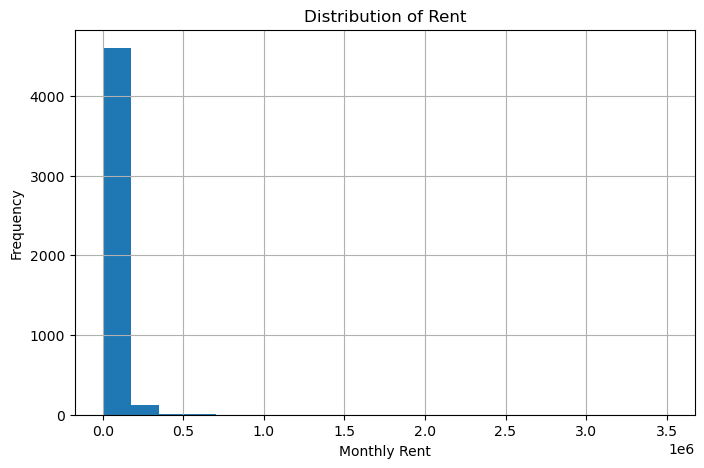

In [20]:
plt.hist(df["Rent"], bins=20)
plt.xlabel("Monthly Rent")
plt.ylabel("Frequency")
plt.title("Distribution of Rent")
plt.show()


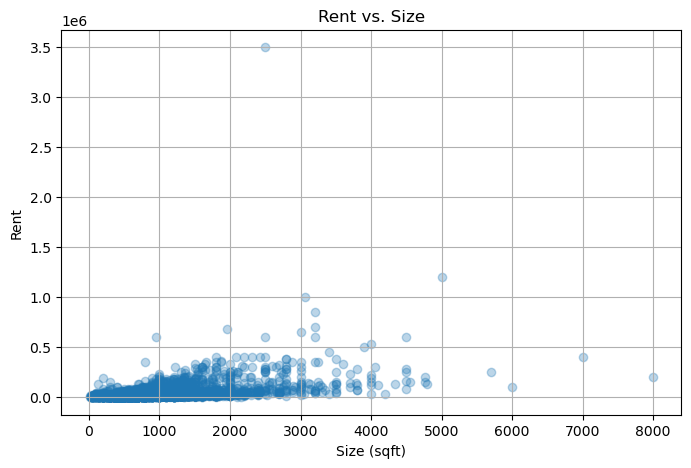

In [22]:
# Relationship between Size and Rent

plt.scatter(df["Size"], df["Rent"], alpha=0.3)
plt.xlabel("Size (sqft)")
plt.ylabel("Rent")
plt.title("Rent vs. Size")
plt.show()


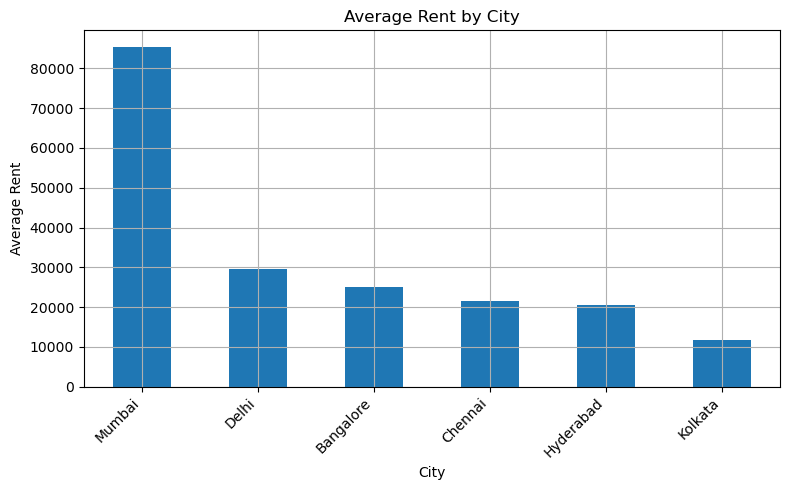

City
Mumbai       85321.204733
Delhi        29461.983471
Bangalore    24966.365688
Chennai      21614.092031
Hyderabad    20555.048387
Kolkata      11645.173664
Name: Rent, dtype: float64

In [23]:
# Average rent by city

avg_rent_by_city = df.groupby("City")["Rent"].mean().sort_values(ascending=False)

avg_rent_by_city.plot(kind="bar")
plt.ylabel("Average Rent")
plt.title("Average Rent by City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

avg_rent_by_city


### 6. Modeling – preprocessing + baseline model

We’ll create a single clean pipeline that:

Splits data into train/test

Preprocesses numeric & categorical features

Trains a Random Forest regressor

Evaluates performance

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [26]:
target_col = "Rent"

feature_cols = [
    "Size",
    "BHK",
    "Bathroom",
    "City",
    "Area Type",
    "Furnishing Status",
    "Tenant Preferred"
]

df_model = df[feature_cols + [target_col]].copy()
df_model.head()


,Size,BHK,Bathroom,City,Area Type,Furnishing Status,Tenant Preferred,Rent
0,1100,2,2,Kolkata,Super Area,Unfurnished,Bachelors/Family,10000
1,800,2,1,Kolkata,Super Area,Semi-Furnished,Bachelors/Family,20000
2,1000,2,1,Kolkata,Super Area,Semi-Furnished,Bachelors/Family,17000
3,800,2,1,Kolkata,Super Area,Unfurnished,Bachelors/Family,10000
4,850,2,1,Kolkata,Carpet Area,Unfurnished,Bachelors,7500


In [28]:
X = df_model[feature_cols]
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((3796, 7), (950, 7))

In [29]:
numeric_features = ["Size", "BHK", "Bathroom"]
categorical_features = ["City", "Area Type", "Furnishing Status", "Tenant Preferred"]

numeric_transformer = "passthrough"

categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [30]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ]
)

clf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Size', 'BHK', 'Bathroom']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['City', 'Area Type',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [31]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Size', 'BHK', 'Bathroom']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['City', 'Area Type',
                                                   'Furnishing Status',
                                                   'Tenant Preferred'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [34]:
y_pred = clf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²  : {r2:.3f}")

MAE : 15,128
RMSE: 49,132
R²  : 0.394


#### Feature importance

In [33]:
ohe = clf.named_steps["preprocess"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(ohe_feature_names)

importances = clf.named_steps["model"].feature_importances_

feature_importance = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance.head(20)

,feature,importance
0,Size,3.146923e-01
2,Bathroom,2.388218e-01
8,City_Mumbai,1.286320e-01
3,City_Bangalore,8.592214e-02
13,Furnishing Status_Semi-Furnished,6.560933e-02
15,Tenant Preferred_Bachelors,4.526960e-02
14,Furnishing Status_Unfurnished,3.500727e-02
16,Tenant Preferred_Bachelors/Family,1.876751e-02
1,BHK,1.632824e-02
10,Area Type_Carpet Area,1.225422e-02


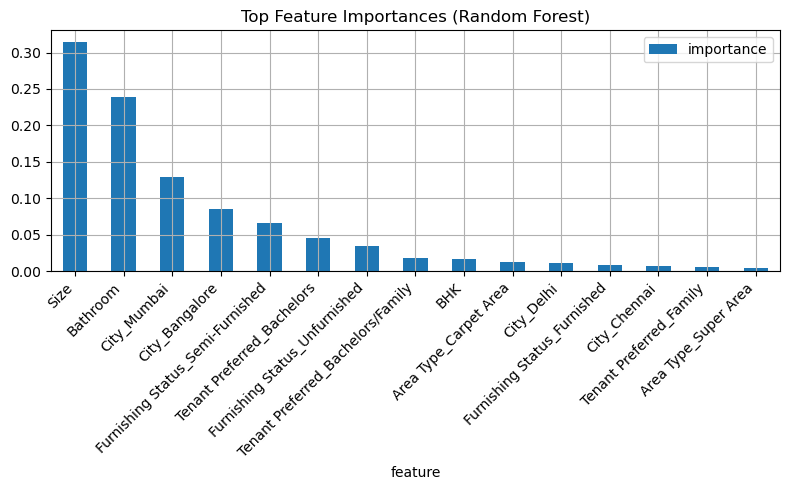

In [35]:
top_n = 15
feature_importance.head(top_n).plot(
    x="feature",
    y="importance",
    kind="bar"
)
plt.title("Top Feature Importances (Random Forest)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 7. Model evaluation – results

The baseline Random Forest model achieves approximately:

- **MAE : 15,128
- **RMSE: 49,132
- **R²  : 0.394 

These metrics indicate how far the model’s predictions are from the true rent values:

- **MAE** and **RMSE** are expressed in the same units as the target (currency units of rent).  
- **R²** shows the proportion of variance in rent explained by the model (1.0 = perfect, 0.0 = no better than mean).

From the feature importance plot:

- Features such as **[ Size, Bathroom, City, BHK]** play the most significant role in predicting rent.
- Categorical factors (`City`, `Furnishing Status`, `Tenant Preferred`) also have a strong influence on the model.


## 8. Conclusion & next steps

In this notebook, I built an end-to-end machine learning pipeline for **predicting house rent prices**:

- Performed **exploratory data analysis (EDA)** to understand distributions and relationships.
- Defined a clean set of **features** and a **target** (`Rent`).
- Implemented a **preprocessing pipeline** using `ColumnTransformer` and `OneHotEncoder` for categorical variables.
- Trained a **Random Forest regression model** and evaluated it using MAE, RMSE, and R².
- Analyzed **feature importance** to understand which factors drive rent.

### Possible improvements

If I continue this project, I would:

- Try **gradient boosting models** (e.g., XGBoost, LightGBM) and compare their performance.
- Perform **hyperparameter tuning** (GridSearchCV / RandomizedSearchCV) for better performance.
- Explore **log-transformation** of the target to handle skewed rent distribution.
- Add **cross-validation** and confidence intervals for more robust evaluation.

This project demonstrates my ability to:

- Work with real-world tabular data  
- Build reproducible ML pipelines in Python  
- Communicate results clearly for business and technical audiences  
